# Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
Data set has 41188 samples and 20 attributes

# Attribute Information:

Input variables:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical:'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [2]:
bank_data = pd.read_csv("bank-additional-full.csv",';')

In [3]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [5]:
bank_data.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [6]:
bank_data[bank_data['duration']==0].shape

(4, 21)

# Removal of unreliable data

If duration is zero the system automatically recognizes the column as 'no' the info is unpedictable as mentioned blow, thus the rows are discarded as suggested in data set.

"Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no').
Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.
Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a
realistic predictive model."

In [7]:
bank_data=bank_data[bank_data['duration']!=0]
bank_data.shape

(41184, 21)

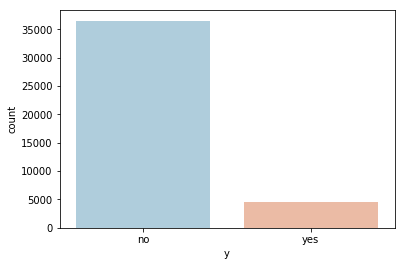

In [8]:
sns.countplot(x='y',data=bank_data,palette='RdBu_r')

It clearly shows that data set is unbalance data set

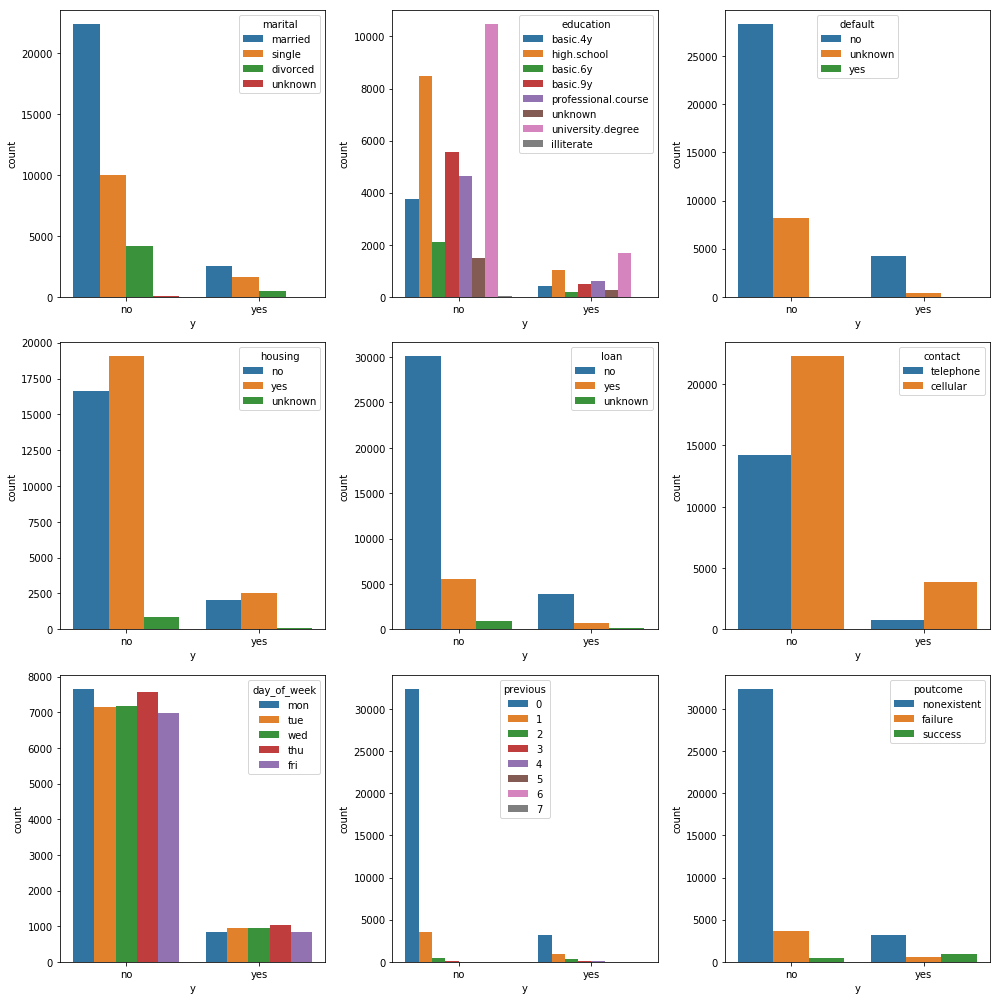

In [9]:
category_cols=['marital', 'education', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'previous', 'poutcome']
fig, axes = plt.subplots(3, 3, figsize=(14, 14))

iter=0
for x_iter in [0,1,2]:
    for y_iter in [0,1,2]:
        sns.countplot( x= "y", data=bank_data,  hue=category_cols[iter], orient='v' , ax=axes[x_iter,y_iter])
        iter=iter+1

fig.tight_layout()

# Age distribution

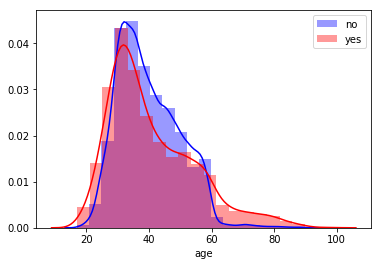

In [10]:
sns.distplot(bank_data[bank_data['y']=='no']['age'],bins=20, color='b', label="no")#rug=True
sns.distplot(bank_data[bank_data['y']=='yes']['age'],bins=20, color='r', label="yes")
plt.legend()

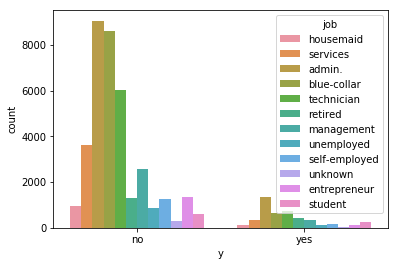

In [11]:
sns.countplot( x= "y", data=bank_data,  hue='job', orient='v')

C:\Users\rames\Anaconda3\lib\site-packages\matplotlib\scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


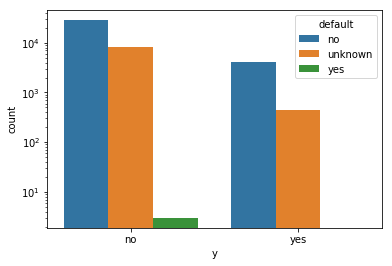

In [12]:
g=sns.countplot(x= "y", data=bank_data,  hue='default', orient='v')
g.set_yscale('log')

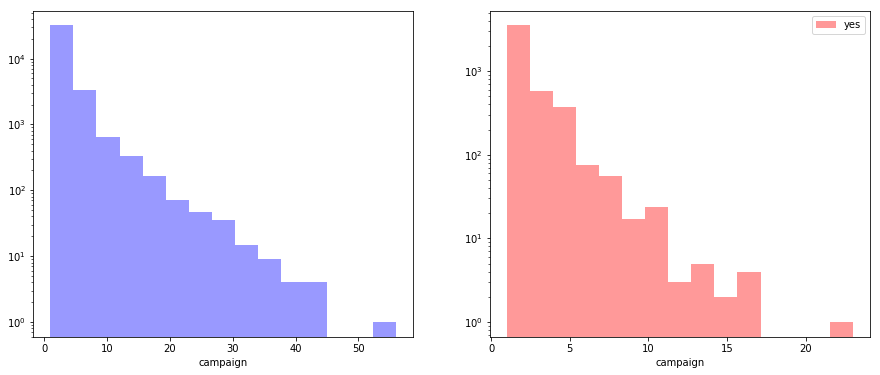

In [13]:
fig1, axes = plt.subplots(1,2, figsize=(15,6))

sns.distplot(bank_data[bank_data['y']=='no']['campaign'],bins=15, color='b', label="no",kde=False, ax=axes[0])#rug=True
sns.distplot(bank_data[bank_data['y']=='yes']['campaign'],bins=15, color='r', label="yes",kde=False, ax=axes[1])
axes[0].set(yscale="log"), axes[1].set(yscale="log")
plt.legend()

# Binning pdays

In [14]:
bins = [0, 6, 11, 16, 21, 26, 31, 1000]
names = ['0-5', '6-10','11-15','16-20', '21-25', '26-30', '999']

bank_data['pdays'] = pd.cut(bank_data['pdays'], bins, labels=names)

In [15]:
bank_data['pdays'].value_counts()

999      39669
0-5       1102
6-10       222
11-15      149
16-20       21
21-25        5
26-30        1
Name: pdays, dtype: int64

In [16]:
bank_data['pdays'] = bank_data['pdays'].cat.codes

C:\Users\rames\Anaconda3\lib\site-packages\matplotlib\scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


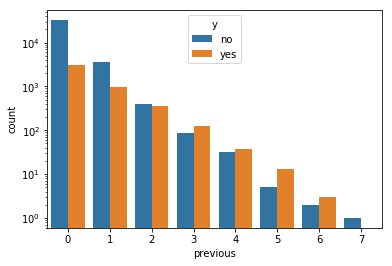

In [17]:
l= sns.countplot(x= "previous", data=bank_data,  hue='y', orient='v')
l.set_yscale('log')

# Pie chart for poutcome

Text(0.5,1,'yes')

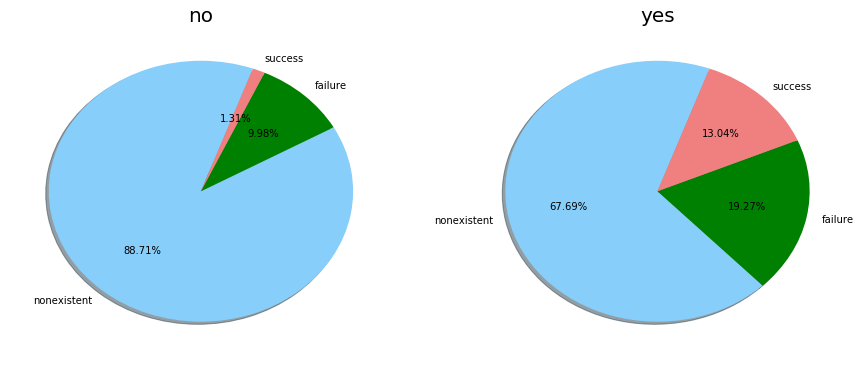

In [18]:
colors = [ 'lightskyblue','green', 'lightcoral']
labels =bank_data[bank_data['y']=='no']['poutcome'].value_counts().axes[0]
#labels =["failure","success", "nonexistent"]
fig, axis = plt.subplots(1,2, figsize=(15,6))
axis[0].pie(bank_data[bank_data['y']=='no']['poutcome'].value_counts(),autopct='%1.2f%%',colors=colors,labels=labels,startangle=70,shadow=True)

axis[1].pie(bank_data[bank_data['y']=='yes']['poutcome'].value_counts(),autopct='%1.2f%%',colors=colors,labels=labels,startangle=70,shadow=True)
axis[0].set_title('no', fontsize=20)
axis[1].set_title('yes', fontsize=20)

In [19]:
bank_data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,6,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,6,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,6,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,6,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,6,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,6,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,6,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,6,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,6,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,6,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [20]:
conti_col=['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

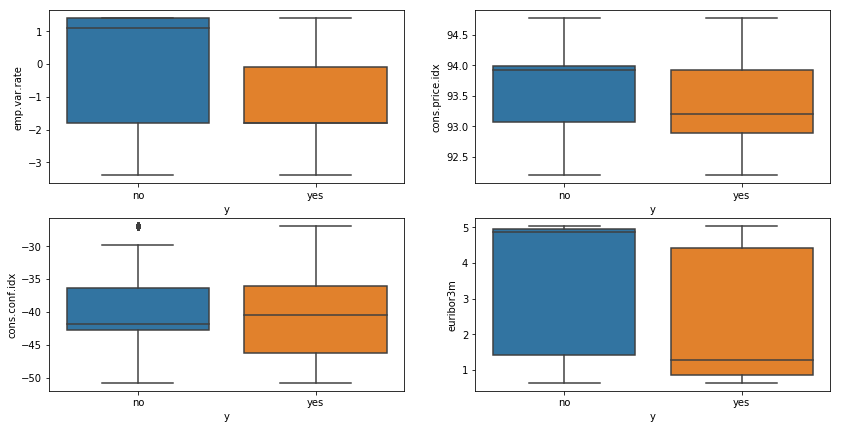

In [21]:
fig, axes = plt.subplots(2,2, figsize=(14,7))
sns.boxplot(y='emp.var.rate', x='y', data=bank_data, ax=axes[0,0])
sns.boxplot(y='cons.price.idx', x='y', data=bank_data, ax=axes[0,1])
sns.boxplot(y='cons.conf.idx', x='y', data=bank_data, ax=axes[1,0])
sns.boxplot(y='euribor3m', x='y', data=bank_data, ax=axes[1,1])

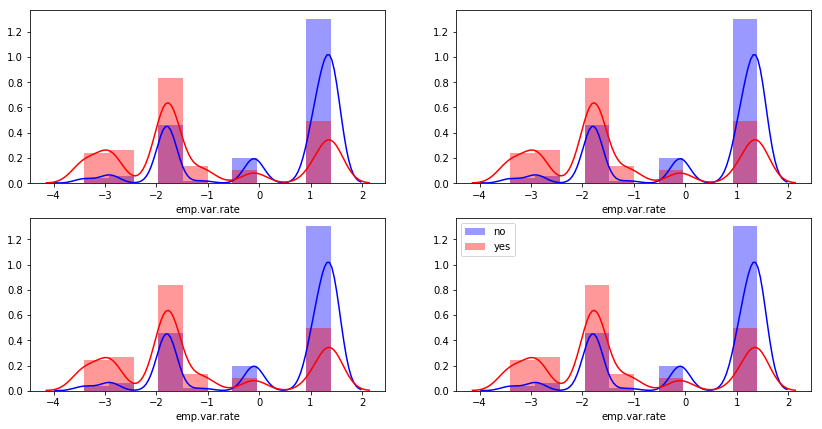

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(14, 7))

iter=0
for x_iter in [0,1]:
    for y_iter in [0,1]:
        sns.distplot(bank_data[bank_data['y']=='no']['emp.var.rate'],bins=10, color='b', label="no", ax=axes[x_iter,y_iter])#rug=True
        sns.distplot(bank_data[bank_data['y']=='yes']['emp.var.rate'],bins=10, color='r', label="yes", ax=axes[x_iter,y_iter])
        iter=iter+1

plt.legend()

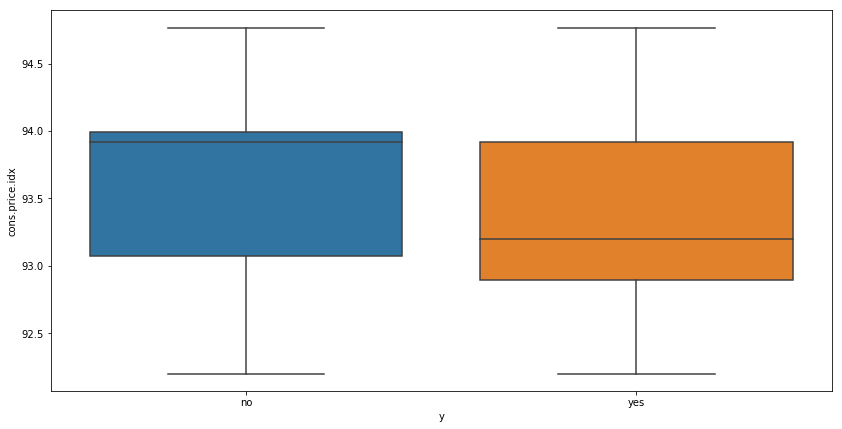

In [23]:
axes = plt.subplots(figsize=(14,7))
sns.boxplot(y='cons.price.idx', x='y', data=bank_data)

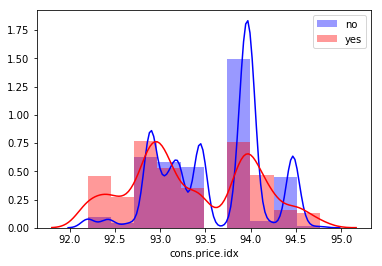

In [24]:
sns.distplot(bank_data[bank_data['y']=='no']['cons.price.idx'],bins=10, color='b', label="no")#rug=True
sns.distplot(bank_data[bank_data['y']=='yes']['cons.price.idx'],bins=10, color='r', label="yes")
plt.legend()

In [25]:
column_names_to_normalize = conti_col
x = bank_data[column_names_to_normalize].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
bank_data_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = bank_data.index)
bank_data[column_names_to_normalize] = bank_data_temp

In [26]:
category_cols1=['job','marital', 'education', 'default', 'housing', 'loan', 'contact','month','day_of_week','previous','pdays', 'poutcome','y']

In [27]:
le = preprocessing.LabelEncoder()
for m in category_cols1:
    bank_data[m]=le.fit_transform(bank_data[m])

In [28]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,7,0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0
1,57,7,1,3,1,0,0,1,6,1,...,1,7,0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0
2,37,7,1,3,0,2,0,1,6,1,...,1,7,0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0
3,40,0,1,1,0,0,0,1,6,1,...,1,7,0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0
4,56,7,1,3,0,0,2,1,6,1,...,1,7,0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0


In [29]:
bank_data.corr()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.001251,-0.389734,-0.117957,0.165005,-0.001694,-0.007346,0.007065,-0.024746,-0.017575,...,0.004468,-0.036834,0.024384,0.019742,-0.000395,0.000870,0.129366,0.010745,-0.017755,0.030419
job,0.001251,1.000000,0.027852,0.134096,-0.028309,0.006982,-0.010236,-0.025127,-0.033215,-0.000867,...,-0.006917,-0.028252,0.020945,0.011516,-0.008301,-0.016037,0.052737,-0.007912,-0.019603,0.025102
marital,-0.389734,0.027852,1.000000,0.109210,-0.079490,0.010517,0.005758,-0.054543,-0.007714,0.002140,...,-0.007214,-0.036423,0.038668,0.001925,-0.084272,-0.057527,-0.033849,-0.092005,-0.086248,0.046181
education,-0.117957,0.134096,0.109210,1.000000,-0.186872,0.016797,0.006379,-0.105724,-0.082650,-0.018026,...,0.000304,-0.046495,0.038829,0.017012,-0.043831,-0.081630,0.078753,-0.036434,-0.041540,0.057797
default,0.165005,-0.028309,-0.079490,-0.186872,1.000000,-0.015794,-0.003805,0.135233,-0.015852,-0.008710,...,0.032867,0.079137,-0.102436,0.023427,0.203264,0.168061,0.026514,0.195336,0.189845,-0.099371
housing,-0.001694,0.006982,0.010517,0.016797,-0.015794,1.000000,0.044317,-0.082208,-0.018067,0.003320,...,-0.011094,-0.011882,0.021330,-0.011791,-0.060240,-0.080533,-0.033891,-0.059324,-0.045895,0.011567
loan,-0.007346,-0.010236,0.005758,0.006379,-0.003805,0.044317,1.000000,-0.008567,-0.005724,-0.009353,...,0.005201,-0.000176,-0.001343,-0.001503,0.001840,-0.002447,-0.012034,0.000114,0.003896,-0.004924
contact,0.007065,-0.025127,-0.054543,-0.105724,0.135233,-0.082208,-0.008567,1.000000,0.276528,-0.009626,...,0.077410,0.116973,-0.212866,0.118753,0.393571,0.591453,0.251581,0.399755,0.269146,-0.144788
month,-0.024746,-0.033215,-0.007714,-0.082650,-0.015852,-0.018067,-0.005724,0.276528,1.000000,0.027641,...,-0.061977,-0.046643,0.103151,-0.065009,-0.178820,-0.004277,0.009628,-0.117297,-0.221451,-0.006080
day_of_week,-0.017575,-0.000867,0.002140,-0.018026,-0.008710,0.003320,-0.009353,-0.009626,0.027641,1.000000,...,-0.038346,-0.010473,-0.004109,0.018736,0.033159,0.005585,0.041366,0.038955,0.028313,0.015962


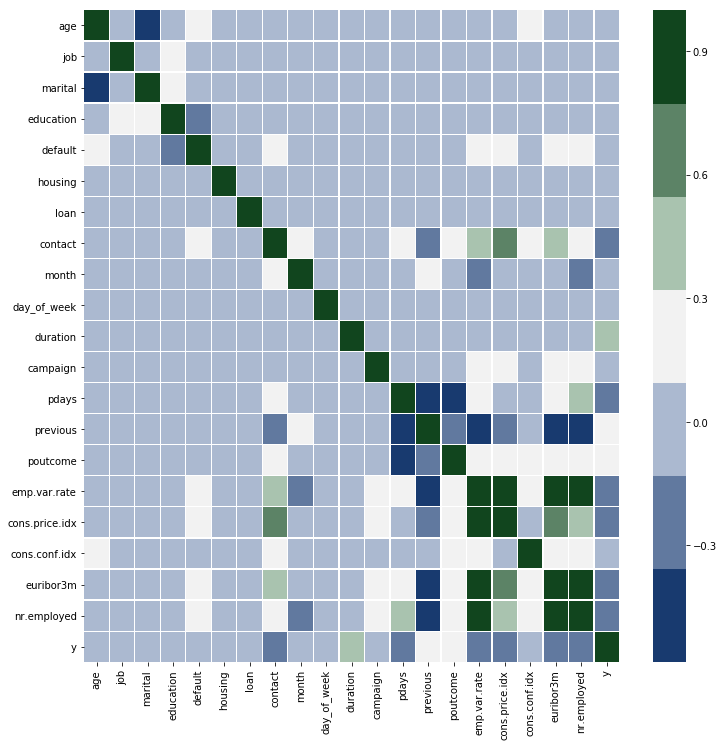

In [30]:

correlation = bank_data.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, 
                 linewidths=.2, cmap=sns.diverging_palette(255, 133, s=85, l=25, n=7))

# Predictive model building

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [32]:
X_train, X_test, y_train, y_test = train_test_split(bank_data.drop('y',axis=1), 
                                                    bank_data['y'], test_size=0.30, 
                                                    random_state=101)

# LogisticRegression classifier

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
log_predictions = logmodel.predict(X_test)

In [36]:
print(confusion_matrix(y_test,log_predictions))

[[10692   303]
 [  773   588]]


In [37]:
accuracy=accuracy_score(y_test,log_predictions)
print(accuracy)

0.912916801553901


In [38]:
print(classification_report(y_test,log_predictions))

             precision    recall  f1-score   support

          0       0.93      0.97      0.95     10995
          1       0.66      0.43      0.52      1361

avg / total       0.90      0.91      0.90     12356



# Decision tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
predictions_tree = dtree.predict(X_test)
print(confusion_matrix(y_test,predictions_tree))

[[10273   722]
 [  654   707]]


In [42]:
accuracy=accuracy_score(y_test,predictions_tree)
accuracy

0.8886370993849142

# Random forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rfc = RandomForestClassifier(n_estimators=500)
rfc_model=rfc.fit(X_train, y_train)

In [45]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))

[[10621   374]
 [  618   743]]


In [46]:
accuracy=accuracy_score(y_test,rfc_pred)
accuracy

0.9197151181612172

In [47]:
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[10621   374]
 [  618   743]]
             precision    recall  f1-score   support

          0       0.95      0.97      0.96     10995
          1       0.67      0.55      0.60      1361

avg / total       0.91      0.92      0.92     12356



# ROC curve

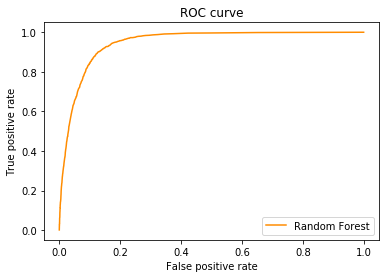

In [56]:
rfc = RandomForestClassifier(n_estimators=500)
rf_fit = rfc.fit(X_train, y_train)
y_predicted = rfc.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_predicted)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='Random Forest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# SVM

In [55]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [56]:
model = SVC()


In [59]:
k= [-15, -11.4, -7.8, -4.2, -0.6, 3]
gamma=[2**n for n in k]
param_grid = {'C': [3], 'gamma': gamma, 'kernel': ['rbf']}

In [60]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)
grid.best_params_

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] C=3, gamma=3.0517578125e-05, kernel=rbf .........................
[CV]  C=3, gamma=3.0517578125e-05, kernel=rbf, score=0.9014568158168574, total=  13.7s
[CV] C=3, gamma=3.0517578125e-05, kernel=rbf .........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.7s remaining:    0.0s


[CV]  C=3, gamma=3.0517578125e-05, kernel=rbf, score=0.8914559267353522, total=  14.1s
[CV] C=3, gamma=3.0517578125e-05, kernel=rbf .........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   37.8s remaining:    0.0s


[CV]  C=3, gamma=3.0517578125e-05, kernel=rbf, score=0.8929128941617234, total=  13.3s
[CV] C=3, gamma=0.0003700479898707026, kernel=rbf ....................
[CV]  C=3, gamma=0.0003700479898707026, kernel=rbf, score=0.9046826222684703, total=  18.9s
[CV] C=3, gamma=0.0003700479898707026, kernel=rbf ....................
[CV]  C=3, gamma=0.0003700479898707026, kernel=rbf, score=0.904048288063274, total=  26.3s
[CV] C=3, gamma=0.0003700479898707026, kernel=rbf ....................
[CV]  C=3, gamma=0.0003700479898707026, kernel=rbf, score=0.9017587678218337, total=  22.3s
[CV] C=3, gamma=0.004487102949207168, kernel=rbf .....................
[CV]  C=3, gamma=0.004487102949207168, kernel=rbf, score=0.9011446409989594, total=  26.7s
[CV] C=3, gamma=0.004487102949207168, kernel=rbf .....................
[CV]  C=3, gamma=0.004487102949207168, kernel=rbf, score=0.9001977312935789, total=  28.2s
[CV] C=3, gamma=0.004487102949207168, kernel=rbf .....................
[CV]  C=3, gamma=0.00448710294

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 55.6min finished


{'C': 3, 'gamma': 0.0003700479898707026, 'kernel': 'rbf'}

In [61]:
grid_predictions = grid.predict(X_test)

In [62]:
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))
accuracy=accuracy_score(y_test,grid_predictions)
print(accuracy)

[[10733   262]
 [  865   496]]
             precision    recall  f1-score   support

          0       0.93      0.98      0.95     10995
          1       0.65      0.36      0.47      1361

avg / total       0.90      0.91      0.90     12356

0.9087892521851731
